# 3 Tasks - To - Do:

## 3.1 Part A: Implementing Convolutional Neural Network from scratch.

### 3.1.1 Data Understanding, Analysis, Visualization and Cleaning

# For classes with duplicated images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Setp 1: Import Necessary Libraries**

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, UnidentifiedImageError

**Step 2: Define Dataset Path**

In [ ]:
# Define the root directory of the dataset
data_dir = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/train"

class_names = sorted(os.listdir(data_dir))

if not class_names:
    print("No class directories found in the dataset!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 9 classes: ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']


**Step 3: Check for Corrupted Images**

In [ ]:
corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError) as e:
                print(f"Corrupted image found: {img_path}")
                corrupted_images.append(img_path)
                os.remove(img_path)  # Remove corrupted file

if corrupted_images:
    print(f"\nRemoved {len(corrupted_images)} corrupted images.")
else:
    print("\nNo corrupted images found.")


No corrupted images found.


**Step 4: Count Class Distribution**

In [ ]:
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)

# Print class distribution
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
aphids                               254
armyworm                             210
beetle                               277
bollworm                             231
grasshopper                          264
mites                                240
mosquito                             281
sawfly                               186
stem_borer                           168


**Step 5: Select One Random Image per Class for Visualization**

In [ ]:
selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

**Step 6: Plot Selected Images**

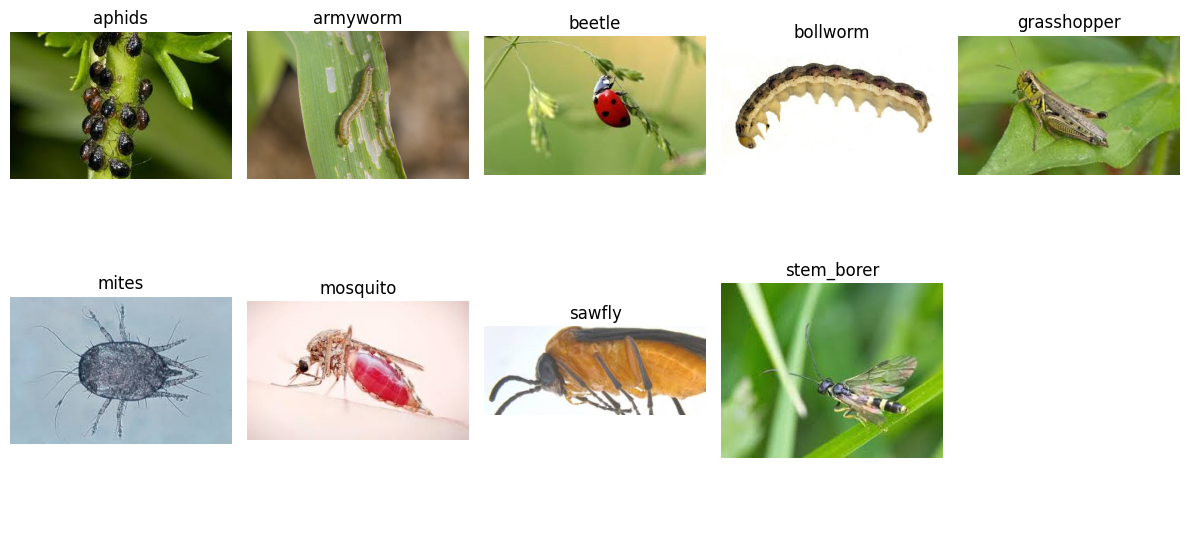

In [ ]:
num_classes = len(selected_images)
cols = (num_classes + 1) // 2
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

**• What does the dataset represent? Provide a brief description.**
  
    The dataset contains labeled images of 9 insect species. The dataset contains no corrupted images but contains duplicate images.*

**• How many total images are in the dataset?**

    The total images in the dataset are: 2111.

**• What is the distribution of images across different classes?**
    Class Distribution:
    =============================================
    Class Name               Valid Image Count
    =============================================
    aphids                               254
    armyworm                             210
    beetle                               277
    bollworm                             231
    grasshopper                          264
    mites                                240
    mosquito                             281
    sawfly                               186
    stem_borer                           168


**• How is the dataset split into training and validation sets? Justify your choice.**

    The dataset is split into training and validation sets using the validation_split argument within the ImageDataGenerator.

**• What preprocessing techniques (e.g., resizing, normalization) were applied?**

    Image resizing to a consistent size (224x224 pixels)

    Normalization (scaling pixel values between 0 and 1)

    Optional data augmentation for regularization

**• What data generators, if any, were used for preprocessing and augmentation?**

    ImageDataGenerator: This Keras utility is used for both preprocessing (resizing, normalization) and data augmentation.


**Step 7: Split Dataset into Training and Validation Using ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 64

# Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1692 images belonging to 9 classes.
Found 419 images belonging to 9 classes.


### 3.1.2 Design, Train, and Evaluate a Baseline Model

**Step 1: Build the Baseline CNN Model Architecture**

In [ ]:
from tensorflow.keras import layers, models

# Define baseline model
baseline_model = models.Sequential(name="Baseline_CNN")

# Input Block - Conv Block 1
baseline_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
baseline_model.add(layers.MaxPooling2D((2, 2)))

# Conv Block 2
baseline_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))

# Conv Block 3
baseline_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))

# Flatten for Dense Layers
baseline_model.add(layers.Flatten())

# Fully Connected Layers
baseline_model.add(layers.Dense(256, activation='relu'))
baseline_model.add(layers.Dense(128, activation='relu'))
baseline_model.add(layers.Dense(64, activation='relu'))

# Output Layer
num_classes = len(class_names)
baseline_model.add(layers.Dense(num_classes, activation='softmax'))

# Print model summary
baseline_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,286,409 (85.02 MB)

 Trainable params: 22,286,409 (85.02 MB)

 Non-trainable params: 0 (0.00 B)

**Step 2: Compile the Baseline Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
baseline_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Add early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

**Step 3: Train the Baseline Model**

In [ ]:
# Train the model
history = baseline_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1236 - loss: 2.3420 - val_accuracy: 0.2578 - val_loss: 2.0657
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 523ms/step - accuracy: 0.3594 - loss: 1.8180 - val_accuracy: 0.3556 - val_loss: 1.8592
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 476ms/step - accuracy: 0.7038 - loss: 0.9674 - val_accuracy: 0.4558 - val_loss: 1.9490
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - accuracy: 0.9015 - loss: 0.3180 - val_accuracy: 0.4845 - val_loss: 2.7003
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 568ms/step - accuracy: 0.9551 - loss: 0.1806 - val_accuracy: 0.5322 - val_loss: 2.3603


**Step 4: Plot Training vs Validation Loss and Accuracy Curves**

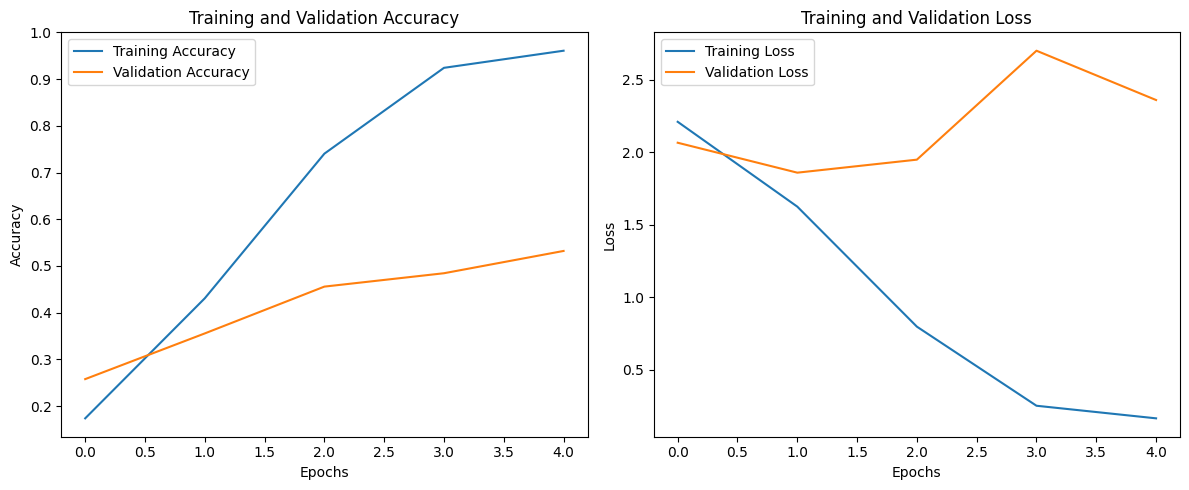

In [ ]:
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate model on validation data
val_loss, val_accuracy = baseline_model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - accuracy: 0.3601 - loss: 1.8233

Validation Accuracy: 0.3556
Validation Loss: 1.8592


## Test

**Load Test Dataset**

In [ ]:
# Define paths
test_dir = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/test"

# Use ImageDataGenerator for rescaling only
test_datagen = ImageDataGenerator(rescale=1./255)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 384 images belonging to 9 classes.


**Get True Labels and Predictions**

In [ ]:
# Reset generator to start from beginning
test_generator.reset()

# Get true labels
y_true = test_generator.classes

# Get predicted probabilities
preds = baseline_model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)  # Convert probabilities to class indices

12/12 ━━━━━━━━━━━━━━━━━━━━ 234s 21s/step


**Generate Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
class_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

      aphids       0.69      0.66      0.67        44
    armyworm       0.36      0.58      0.45        43
      beetle       0.84      0.62      0.71        50
    bollworm       0.76      0.44      0.56        36
 grasshopper       0.41      0.70      0.52        46
       mites       0.72      0.43      0.54        42
    mosquito       0.68      0.82      0.75        50
      sawfly       0.82      0.24      0.38        37
  stem_borer       0.44      0.50      0.47        36

    accuracy                           0.57       384
   macro avg       0.64      0.55      0.56       384
weighted avg       0.64      0.57      0.57       384



**Generate Confusion Matrix**

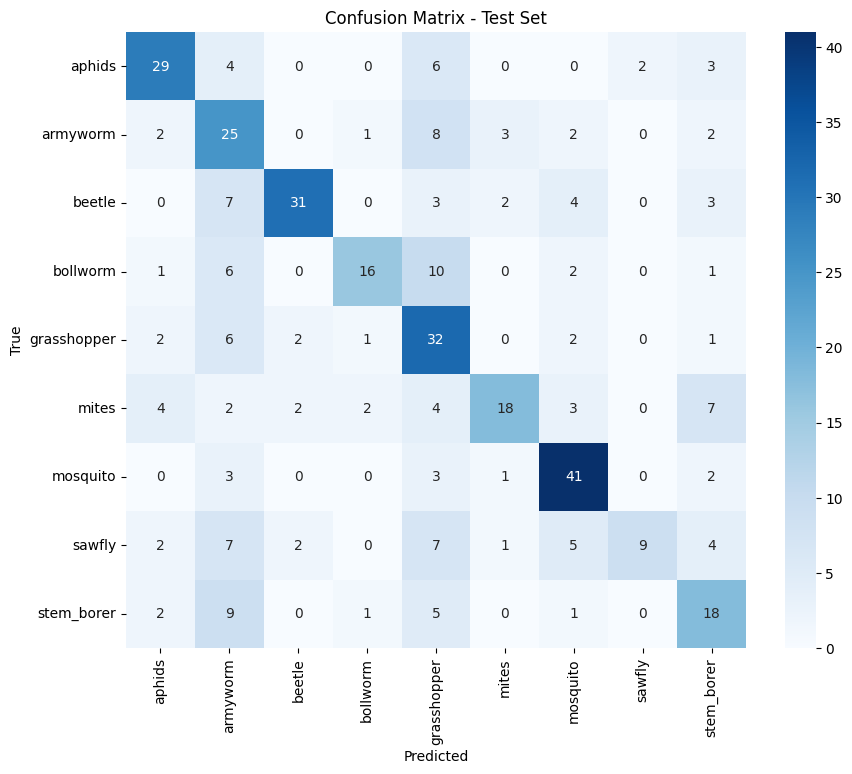

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()

**Show 5 Misclassified Samples**

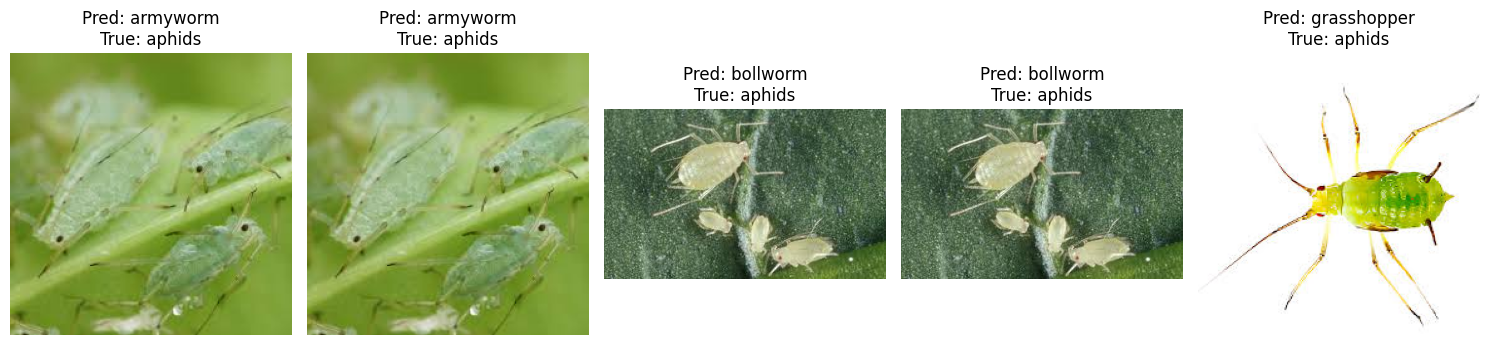

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Find indices where prediction != true label
misclassified_indices = np.where(y_pred != y_true)[0]

# Pick up to 5 misclassified samples
num_samples = min(5, len(misclassified_indices))

plt.figure(figsize=(15, 6))

for i in range(num_samples):
    idx = misclassified_indices[i]
    img_path = test_generator.filepaths[idx]
    img = mpimg.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# For classes without duplicated images

**Step 1: Remove Duplicate Images**

In [ ]:
import os
import shutil

def remove_copy_duplicates(src_dir, dest_dir):
    """
    Remove images with 'Copy' in the filename and save deduplicated dataset to dest_dir.
    Preserves folder structure.
    """
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    print(f"\nProcessing directory: {src_dir}")
    print(f"Saving deduplicated data to: {dest_dir}")

    total_duplicates = 0

    for class_name in os.listdir(src_dir):
        class_path = os.path.join(src_dir, class_name)
        dest_class_path = os.path.join(dest_dir, class_name)

        # Skip if not a directory
        if not os.path.isdir(class_path):
            continue

        # Create destination class directory
        if not os.path.exists(dest_class_path):
            os.makedirs(dest_class_path)

        print(f"\nClass: {class_name}")
        duplicates_count = 0

        for img_file in os.listdir(class_path):
            if "Copy" in img_file:
                duplicates_count += 1
                continue  # Skip copy files
            src_img_path = os.path.join(class_path, img_file)
            dest_img_path = os.path.join(dest_class_path, img_file)
            shutil.copy(src_img_path, dest_img_path)

        print(f"Removed {duplicates_count} duplicate(s) from '{class_name}'")
        total_duplicates += duplicates_count

    print(f"\nTotal duplicates removed from '{os.path.basename(src_dir)}': {total_duplicates}")


# Define paths
dataset_root = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification"
train_dir = os.path.join(dataset_root, "train")
test_dir = os.path.join(dataset_root, "test")

train_clean_dir = os.path.join(dataset_root, "train_no_duplicates")
test_clean_dir = os.path.join(dataset_root, "test_no_duplicates")

# Run deduplication
remove_copy_duplicates(train_dir, train_clean_dir)
remove_copy_duplicates(test_dir, test_clean_dir)

print("\n Deduplication complete. Clean datasets saved:")
print(f"- Train: {train_clean_dir}")
print(f"- Test: {test_clean_dir}")


Processing directory: /content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/train
Saving deduplicated data to: /content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/train_no_duplicates

Class: aphids
Removed 206 duplicate(s) from 'aphids'

Class: mosquito
Removed 216 duplicate(s) from 'mosquito'

Class: armyworm
Removed 162 duplicate(s) from 'armyworm'

Class: mites
Removed 194 duplicate(s) from 'mites'

Class: stem_borer
Removed 119 duplicate(s) from 'stem_borer'

Class: beetle
Removed 219 duplicate(s) from 'beetle'

Class: sawfly
Removed 149 duplicate(s) from 'sawfly'

Class: grasshopper
Removed 213 duplicate(s) from 'grasshopper'

Class: bollworm
Removed 173 duplicate(s) from 'bollworm'

Class: train_no_duplicates
Removed 0 duplicate(s) from 'train_no_duplicates'

Total duplicates removed from 'train': 1651

Processing directory: /content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/test
Saving deduplicated data to: /content/drive/MyDrive/A

**Step 2: Define Dataset Path**

In [ ]:
# Define the root directory of the dataset
data_dir = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/train_no_duplicates"

class_names = sorted(os.listdir(data_dir))

if not class_names:
    print("No class directories found in the dataset!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 10 classes: ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer', 'train_no_duplicates']


**Step 3: Check for Corrupted Images**

In [ ]:
corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError) as e:
                print(f"Corrupted image found: {img_path}")
                corrupted_images.append(img_path)
                os.remove(img_path)  # Remove corrupted file

if corrupted_images:
    print(f"\nRemoved {len(corrupted_images)} corrupted images.")
else:
    print("\nNo corrupted images found.")


No corrupted images found.


**Step 4: Count Class Distribution**

In [ ]:
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)

# Print class distribution
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
aphids                                48
armyworm                              48
beetle                                58
bollworm                              58
grasshopper                           51
mites                                 46
mosquito                              65
sawfly                                37
stem_borer                            49
train_no_duplicates                    0


**Step 5: Select One Random Image per Class for Visualization**

In [ ]:
selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

**Step 6: Plot Selected Images**

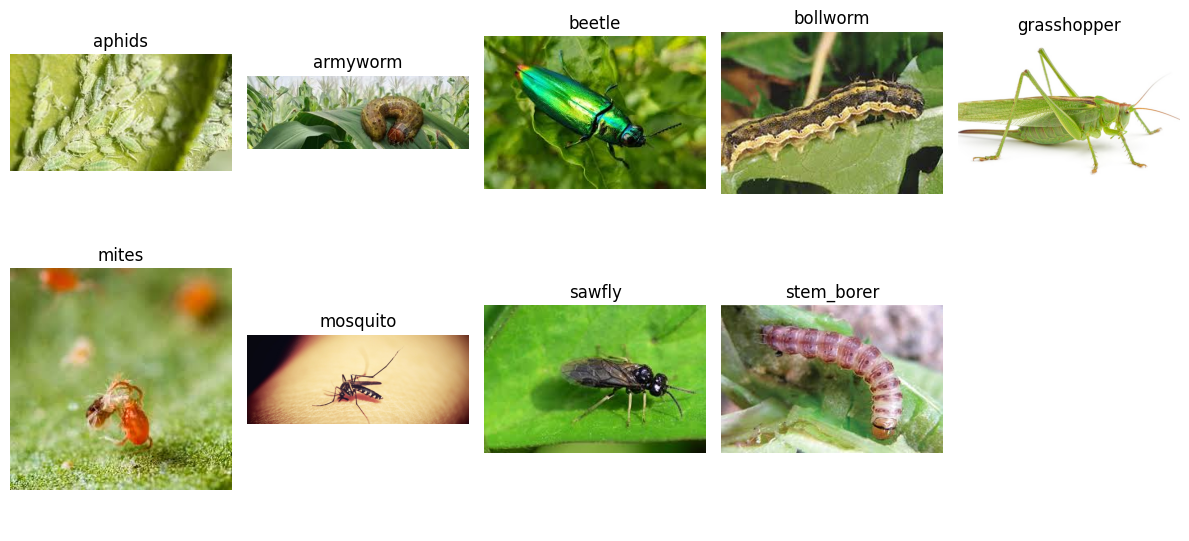

In [ ]:
num_classes = len(selected_images)
cols = (num_classes + 1) // 2
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

**Step 7: Split Dataset into Training and Validation Using ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 64

# Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 372 images belonging to 10 classes.
Found 88 images belonging to 10 classes.


**Step 1: Build the Baseline CNN Model Architecture**

In [ ]:
from tensorflow.keras import layers, models

# Define baseline model
baseline_model = models.Sequential(name="Baseline_CNN")

# Input Block - Conv Block 1
baseline_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
baseline_model.add(layers.MaxPooling2D((2, 2)))

# Conv Block 2
baseline_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))

# Conv Block 3
baseline_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))

# Flatten for Dense Layers
baseline_model.add(layers.Flatten())

# Fully Connected Layers
baseline_model.add(layers.Dense(256, activation='relu'))
baseline_model.add(layers.Dense(128, activation='relu'))
baseline_model.add(layers.Dense(64, activation='relu'))

# Output Layer
num_classes = len(class_names)
baseline_model.add(layers.Dense(num_classes, activation='softmax'))

# Print model summary
baseline_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,286,474 (85.02 MB)

 Trainable params: 22,286,474 (85.02 MB)

 Non-trainable params: 0 (0.00 B)

**Step 2: Compile the Baseline Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
baseline_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Add early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

**Step 3: Train the Baseline Model**

In [ ]:
# Train the model
history = baseline_model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.1166 - loss: 3.3828 - val_accuracy: 0.1477 - val_loss: 2.2547
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 734ms/step - accuracy: 0.1290 - loss: 2.2533 - val_accuracy: 0.1705 - val_loss: 2.2007
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.2403 - loss: 2.1835 - val_accuracy: 0.2273 - val_loss: 2.1531
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.2226 - loss: 2.1109 - val_accuracy: 0.3295 - val_loss: 2.0830
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 505ms/step - accuracy: 0.3320 - loss: 1.9888 - val_accuracy: 0.3295 - val_loss: 1.9854
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 690ms/step - accuracy: 0.3641 - loss: 1.7883 - val_accuracy: 0.3182 - val_loss: 1.8876
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 480ms/step - accuracy: 0.4839 - loss: 1.5142 - val_accuracy: 0.3750 - val_loss: 1.8114
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step - accuracy: 0.5388 - loss: 1.3060 - val_accuracy: 0.4318 - val_loss: 1

**Step 4: Plot Training vs Validation Loss and Accuracy Curves**

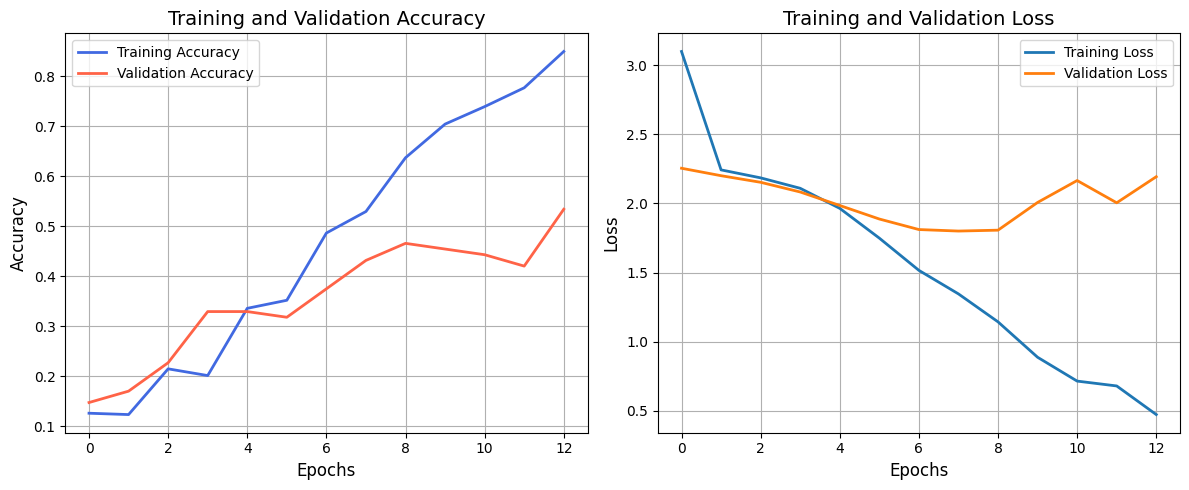

In [ ]:
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', color='royalblue', linewidth=2)
plt.plot(epochs, val_acc, label='Validation Accuracy', color='tomato', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate model on validation data
val_loss, val_accuracy = baseline_model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.4337 - loss: 1.8253

Validation Accuracy: 0.4318
Validation Loss: 1.8005


## Add data augmentation to test if accuracy Increases

In [ ]:
train_datagen1 = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator1 = train_datagen1.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 372 images belonging to 10 classes.


In [ ]:
# Train the model
history1 = baseline_model.fit(
    train_generator1,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3754 - loss: 1.6197 - val_accuracy: 0.4318 - val_loss: 1.7197
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4413 - loss: 1.5429 - val_accuracy: 0.4432 - val_loss: 1.7640
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4420 - loss: 1.5264 - val_accuracy: 0.4886 - val_loss: 1.8213
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5065 - loss: 1.4177 - val_accuracy: 0.5000 - val_loss: 1.6741
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5668 - loss: 1.3291 - val_accuracy: 0.4773 - val_loss: 1.7834
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5242 - loss: 1.2777 - val_accuracy: 0.4886 - val_loss: 1.7082
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5135 - loss: 1.3127 - val_accuracy: 0.4773 - val_loss: 1.7146
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5555 - loss: 1.2291 - val_accuracy: 0.5227 - val_loss: 1.7216
Epoch 9/30
6/6 ━

As we can see after adding data augmentation, the accuracy and loss did not improve necessarily

## Test on unseen data

**Load Test Dataset**

In [ ]:
# Define paths
test_dir = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/test_no_duplicates"

# Use ImageDataGenerator for rescaling only
test_datagen = ImageDataGenerator(rescale=1./255)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct label alignment
)

Found 343 images belonging to 9 classes.


**Get True Labels and Predictions**

In [ ]:
# Reset generator to start from beginning
test_generator.reset()

# Get true labels
y_true = test_generator.classes  # Shape: (num_samples, )

# Get predicted probabilities
preds = baseline_model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)  # Convert probabilities to class indices

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 396ms/step


**Generate Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
class_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

      aphids       0.59      0.41      0.48        32
    armyworm       0.55      0.50      0.52        36
      beetle       0.59      0.83      0.69        46
    bollworm       0.56      0.67      0.61        36
 grasshopper       0.74      0.43      0.55        46
       mites       0.50      0.57      0.53        28
    mosquito       0.84      0.74      0.79        50
      sawfly       0.35      0.44      0.39        36
  stem_borer       0.66      0.64      0.65        33

    accuracy                           0.59       343
   macro avg       0.60      0.58      0.58       343
weighted avg       0.61      0.59      0.59       343



**Generate Confusion Matrix**

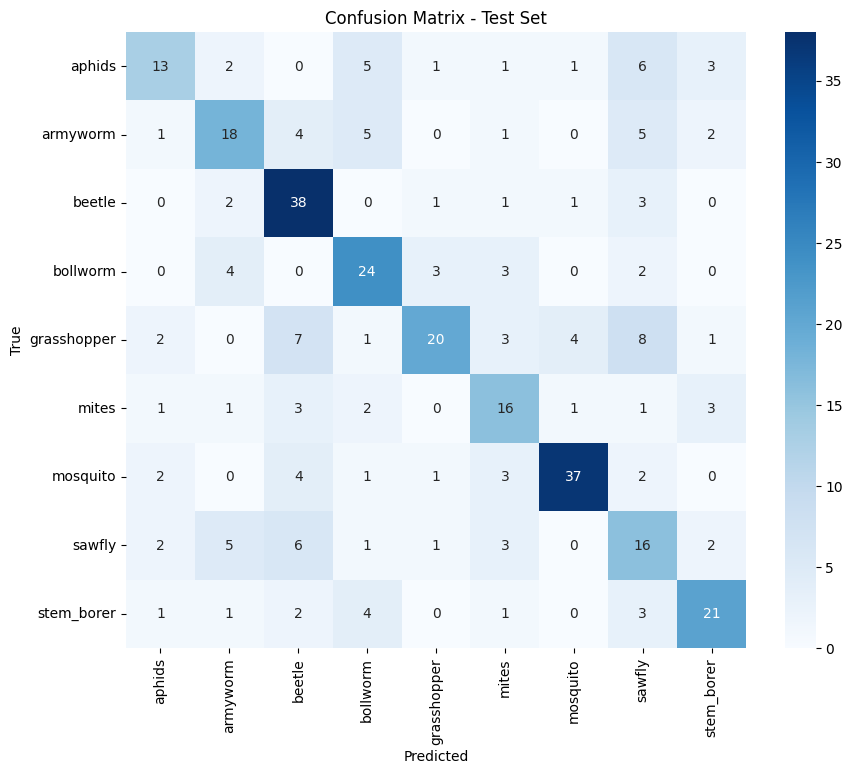

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()

## 3.1.3 Design, Train , and Evaluate Deeper Architecture with Regularization Layer

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# Path to cleaned dataset
data_dir = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/train_no_duplicates"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 64
SEED = 42

augment_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Train generator
train_generator_deep = augment_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=SEED
)

# For validation: only rescaling, no augmentation
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Validation generator
val_generator_deep = val_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=SEED
)

# Number of classes
num_classes = train_generator_deep.num_classes

Found 372 images belonging to 9 classes.
Found 88 images belonging to 9 classes.


In [ ]:
deep_model = Sequential()

# Block 1
deep_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D((2, 2)))
deep_model.add(Dropout(0.2))

# Block 2
deep_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D((2, 2)))
deep_model.add(Dropout(0.3))

# Block 3
deep_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D((2, 2)))
deep_model.add(Dropout(0.3))

deep_model.add(GlobalAveragePooling2D())
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dropout(0.4))
deep_model.add(Dense(num_classes, activation='softmax'))

# Compile
deep_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary for submission
deep_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,817 (436.79 KB)

 Trainable params: 111,369 (435.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
import time

# Add Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('deep_model.keras', save_best_only=True)

# Start timer
start_time = time.time()

# Train the Model
history_deep = deep_model.fit(
    train_generator_deep,
    validation_data=val_generator_deep,
    epochs=50,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# End timer
end_time = time.time()
total_time = end_time - start_time

print(f"\n adam optimizer training completed in {total_time:.2f} seconds.")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 170s 28s/step - accuracy: 0.1285 - loss: 2.4988 - val_accuracy: 0.1136 - val_loss: 2.1952 - learning_rate: 5.0000e-04
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1722 - loss: 2.3435 - val_accuracy: 0.1023 - val_loss: 2.1979 - learning_rate: 5.0000e-04
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1754 - loss: 2.1475 - val_accuracy: 0.1023 - val_loss: 2.2039 - learning_rate: 5.0000e-04
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2579 - loss: 2.0169 - val_accuracy: 0.1250 - val_loss: 2.2121 - learning_rate: 5.0000e-04
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2760 - loss: 1.9817 - val_accuracy: 0.1250 - val_loss: 2.2167 - learning_rate: 1.0000e-04
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2518 - loss: 1.9975 - val_accuracy: 0.1136 - val_loss: 2.2211 - learning_rate: 1.0000e-04
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2857 - loss: 1.9827 - val_accu

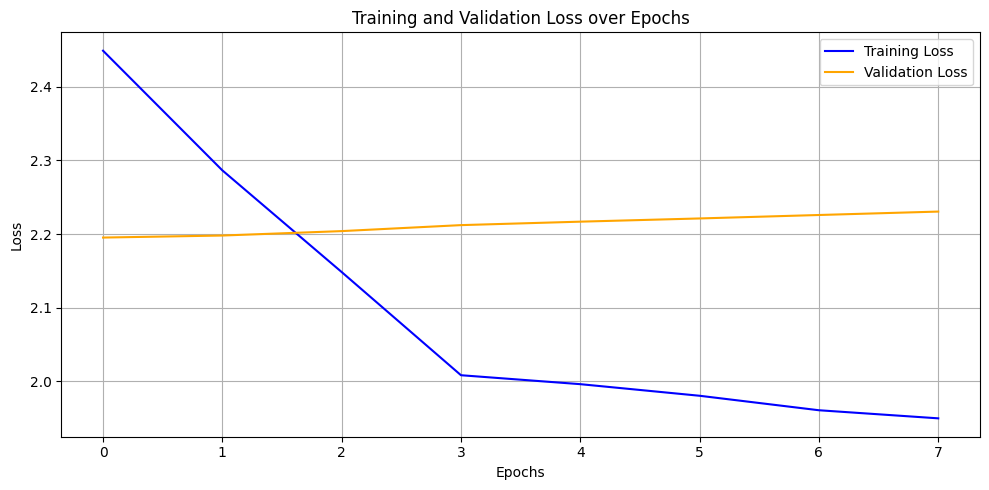

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_loss(history_deep)


### Load Test Dataset

In [ ]:
# Define test directory
test_dir = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/test_no_duplicates"

# Create test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)

Found 343 images belonging to 9 classes.


### Evaluate Deeper Model on Test Set

In [ ]:
# Reset generator to start from beginning
test_generator.reset()

# Get true labels
y_true = test_generator.classes

# Get predicted probabilities
preds = deep_model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 124s 6s/step


### Generate Predictions and True Labels

In [ ]:
# Reset generator
test_generator.reset()

# Get true labels
y_true = test_generator.classes

# Get predictions
preds = deep_model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


### Classification Report

In [ ]:
# Print classification report
class_names = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

      aphids       0.13      0.66      0.22        32
    armyworm       0.00      0.00      0.00        36
      beetle       0.00      0.00      0.00        46
    bollworm       0.00      0.00      0.00        36
 grasshopper       0.00      0.00      0.00        46
       mites       0.09      0.57      0.15        28
    mosquito       0.00      0.00      0.00        50
      sawfly       0.00      0.00      0.00        36
  stem_borer       0.00      0.00      0.00        33

    accuracy                           0.11       343
   macro avg       0.02      0.14      0.04       343
weighted avg       0.02      0.11      0.03       343



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix

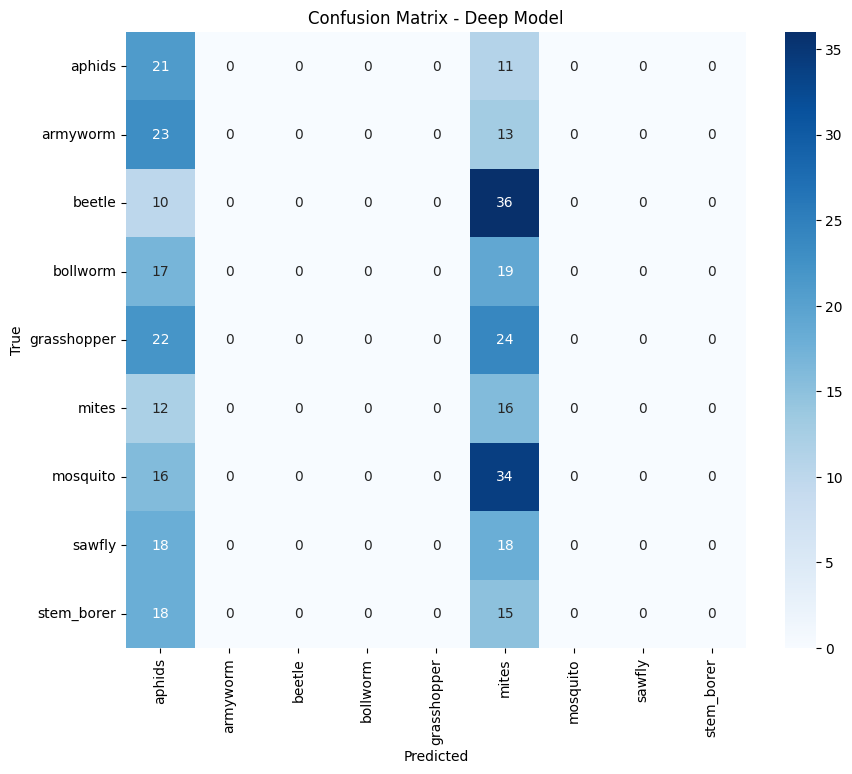

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Deep Model')
plt.show()

In [ ]:
# Compile again with sgd optimizer
deep_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

import time

# Add Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('deep_model.keras', save_best_only=True)

# Start timer
start_time = time.time()

# Train the Model
history_deep = deep_model.fit(
    train_generator_deep,
    validation_data=val_generator_deep,
    epochs=50,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# End timer
end_time = time.time()
total_time = end_time - start_time

print(f"\n sgd optimizer training completed in {total_time:.2f} seconds.")

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.1603 - loss: 2.2498 - val_accuracy: 0.1136 - val_loss: 2.1972 - learning_rate: 5.0000e-04
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2062 - loss: 2.1714 - val_accuracy: 0.1023 - val_loss: 2.2009 - learning_rate: 5.0000e-04
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 970ms/step - accuracy: 0.2179 - loss: 2.1387 - val_accuracy: 0.1023 - val_loss: 2.2042 - learning_rate: 5.0000e-04
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1578 - loss: 2.2633 - val_accuracy: 0.1023 - val_loss: 2.2078 - learning_rate: 5.0000e-04
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 972ms/step - accuracy: 0.1931 - loss: 2.2358 - val_accuracy: 0.1023 - val_loss: 2.2108 - learning_rate: 1.0000e-04
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1989 - loss: 2.1865 - val_accuracy: 0.1023 - val_loss: 2.2134 - learning_rate: 1.0000e-04
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 956ms/step - accuracy: 0.1744 - loss: 2.2289 - v

# 3.1.4 Experimentation and Comparative Analysis

## Baseline vs. Deeper Model Performance

Key Observations:

#### Baseline CNN :

1. Achieved reasonable performance with an accuracy of around 0.59.
2. Stable training and validation losses, indicating good generalization.
3. Balanced precision, recall, and F1-scores across most classes.
4. In the baseline there are two models, one with many duplicate images and one without duplicate images.
5. The dataset with duplicated overfitted on the dataset whereas the dataset without duplicate image didnot.

#### Deeper CNN :

1. Failed to learn meaningful patterns → Accuracy dropped to around 0.15.
2. Extremely low F1-scores (~0.0375), indicating poor classification ability.
3. High training and validation losses, suggesting severe underfitting.

#### Conclusion:

Adding more layers and filters did not improve performance; instead, it led to underfitting. The reason might be:

1. Insufficient data to train a deeper model because the duplicated images were removed.

2. Over-regularization or improper learning rate tuning.

3. Potential issues with initialization or architecture design.

## Computational Efficiency

#### Baseline CNN :

1. Simpler architecture directly correlates to Faster training per epoch.
2. Lower computational cost due to fewer parameters.

#### Deeper CNN :
1. More layers and parameters means Longer training time per epoch.
2. Higher computational cost, especially on GPU/TPU.

#### Trade-offs Between Complexity and Efficiency

Simpler Models (Baseline CNN) :

1. Faster training means Better for quick iterations.
2. Lower risk of overfitting with small datasets.

Complex Models (Deeper CNN) :

1. Complex models might perform better with large datasets.
2. Requires more computational resources and careful tuning.

## Optimizer Analysis: SGD vs Adam

### Adam Optimizer:

1. Final Validation Accuracy : ~0.11
2. Final Validation Loss : ~2.20
3. Convergence Speed : Faster than SGD initially.
4. Training Time : 282.37 seconds (about 4.7 minutes)
5. Loss Reduction: 	Some reduction, then stagnated
6. Early Stopping Triggered?: Yes

### SGD Optimizer

1. Final Validation Accuracy : ~0.10
2. Final Validation Loss : ~2.21
3. Convergence Speed : Slower at first, no improvement later.
4. Training Time : 70.22 seconds (much faster than Adam)
5. Loss Reduction: Slight decrease (close to none)
6. Early Stopping Triggered?: Yes

So comparatively, adam had better learning dynamics but got stuck quickly. SGD has slower start but it was equally ineffective as adam.

Both failed to converge meaningfully on the deeper model. There was no clear winner because neither optimizer could overcome architectural limitations.

## Challenges and Observations

1. Underfitting in Deeper Model: Both Adam and SGD-trained deeper CNNs showed severe underfitting
2. High Dropout Values: Dropout rates of 0.4–0.5 may have hindered learning
3. Class Imbalance:Some classes had fewer images than others, possibly affecting generalization
4. Small Dataset Size: After removing duplicate images the dataset became so small that the deeper model could not work properly. The dataset with duplicate image couldnot be used because it lacked in generalization(Overfitted).
5. Hardware Constraints: Limited gpu access time in google colab.

### Total Training Time for Deeper Architecture:

Adam: 282.37 s

SGD: 70.22 s

### Hardware Acceleration

All experiments were conducted using Google Colab’s T4 GPU , which provided hardware acceleration.

# 3.2 Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning).

### Import Required Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Model, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### Define Dataset Paths and Parameters

In [ ]:
# Dataset paths
train_dir = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/train_no_duplicates"
test_dir = "/content/drive/MyDrive/AI and ML/Assignment 1/Insect Classification/test_no_duplicates"

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

### Create Data Generators

In [ ]:
# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator_tl = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

# Test generator
test_generator_tl = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Get class names and number of classes
class_names = list(train_generator_tl.class_indices.keys())
num_classes = len(class_names)

print(f"\nFound {num_classes} classes: {class_names}")

Found 460 images belonging to 9 classes.
Found 343 images belonging to 9 classes.

Found 9 classes: ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']


### Load a Pre-Trained Model (MobileNetV2)

In [ ]:
# Load MobileNetV2 without top layer
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Print summary
print("\nPretrained Base Model Summary:")
base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Pretrained Base Model Summary:


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

### Add Custom Top Layers for Insect Classification

In [ ]:
# Add custom layers on top of the base model
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

# Final model
transfer_model = Model(base_model.input, output)

# Compile the model
transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
print("\nTransfer Learning Model Summary:")
transfer_model.summary()


Transfer Learning Model Summary:


Model: "functional_84"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,578,953 (13.65 MB)

 Trainable params: 1,320,969 (5.04 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Train the Transfer Learning Model

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history_transfer = transfer_model.fit(
    train_generator_tl,
    epochs=30,
    validation_data=test_generator_tl,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 710ms/step - accuracy: 0.8965 - loss: 0.3647 - val_accuracy: 0.9300 - val_loss: 0.3350 - learning_rate: 1.0000e-04
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 630ms/step - accuracy: 0.8815 - loss: 0.3957 - val_accuracy: 0.9271 - val_loss: 0.3191 - learning_rate: 1.0000e-04
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 719ms/step - accuracy: 0.9222 - loss: 0.3226 - val_accuracy: 0.9329 - val_loss: 0.3134 - learning_rate: 1.0000e-04
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 710ms/step - accuracy: 0.9136 - loss: 0.3103 - val_accuracy: 0.9271 - val_loss: 0.2956 - learning_rate: 1.0000e-04
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 693ms/step - accuracy: 0.9118 - loss: 0.3005 - val_accuracy: 0.9300 - val_loss: 0.3012 - learning_rate: 1.0000e-04
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 631ms/step - accuracy: 0.8879 - loss: 0.3583 - val_accuracy: 0.9271 - val_loss: 0.2795 - learning_rate: 1.0000e-04
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 729ms/step - accur

### Fine-Tuning – Unfreeze Some Layers

In [ ]:
# Unfreeze some top layers
for layer in base_model.layers[-20:]:  # Tune the last 20 layers
    layer.trainable = True

# Recompile with lower learning rate
transfer_model.compile(optimizer=Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Retrain with fine-tuning
history_fine_tuned = transfer_model.fit(
    train_generator_tl,
    epochs=10,
    validation_data=test_generator_tl,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8960 - loss: 0.3923 - val_accuracy: 0.9592 - val_loss: 0.2009 - learning_rate: 1.0000e-05
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 739ms/step - accuracy: 0.8594 - loss: 0.4094 - val_accuracy: 0.9563 - val_loss: 0.2061 - learning_rate: 1.0000e-05
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - accuracy: 0.9367 - loss: 0.2749 - val_accuracy: 0.9534 - val_loss: 0.2103 - learning_rate: 1.0000e-05
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 621ms/step - accuracy: 0.8854 - loss: 0.3550 - val_accuracy: 0.9504 - val_loss: 0.2113 - learning_rate: 1.0000e-05
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 721ms/step - accuracy: 0.8951 - loss: 0.3290 - val_accuracy: 0.9504 - val_loss: 0.2107 - learning_rate: 2.0000e-06
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 730ms/step - accuracy: 0.9041 - loss: 0.3043 - val_accuracy: 0.9504 - val_loss: 0.2097 - learning_rate: 2.0000e-06


### Evaluate the Transfer Learning Model

In [ ]:
# Evaluate on test set
test_loss, test_acc = transfer_model.evaluate(test_generator_tl)
print(f"\nTest Accuracy (Transfer Learning): {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions
test_generator_tl.reset()
y_true_tl = test_generator_tl.classes
preds_tl = transfer_model.predict(test_generator_tl)
y_pred_tl = np.argmax(preds_tl, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9651 - loss: 0.1988

Test Accuracy (Transfer Learning): 0.9592
Test Loss: 0.2009
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 540ms/step


### Classification Report and Confusion Matrix

Classification Report (Transfer Learning):
              precision    recall  f1-score   support

      aphids       0.94      0.97      0.95        32
    armyworm       0.95      0.97      0.96        36
      beetle       1.00      0.93      0.97        46
    bollworm       0.92      0.97      0.95        36
 grasshopper       0.96      1.00      0.98        46
       mites       0.93      1.00      0.97        28
    mosquito       0.98      1.00      0.99        50
      sawfly       1.00      0.83      0.91        36
  stem_borer       0.94      0.94      0.94        33

    accuracy                           0.96       343
   macro avg       0.96      0.96      0.96       343
weighted avg       0.96      0.96      0.96       343



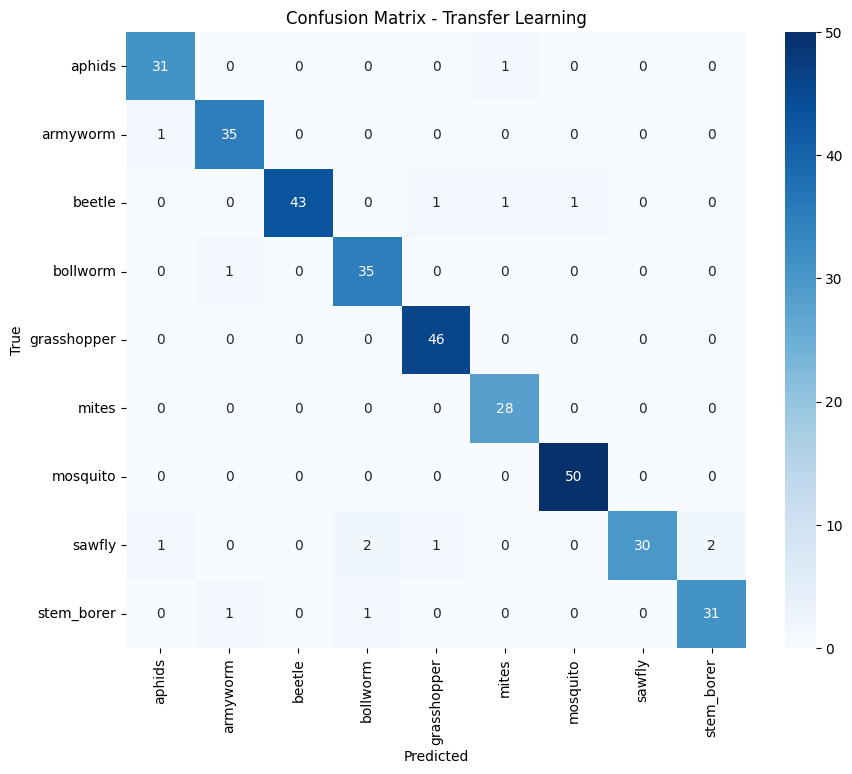

In [ ]:
# Print classification report
print("Classification Report (Transfer Learning):")
print(classification_report(y_true_tl, y_pred_tl, target_names=class_names))

# Confusion matrix
cm_tl = confusion_matrix(y_true_tl, y_pred_tl)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tl, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Transfer Learning')
plt.show()

### Plot Training Curves

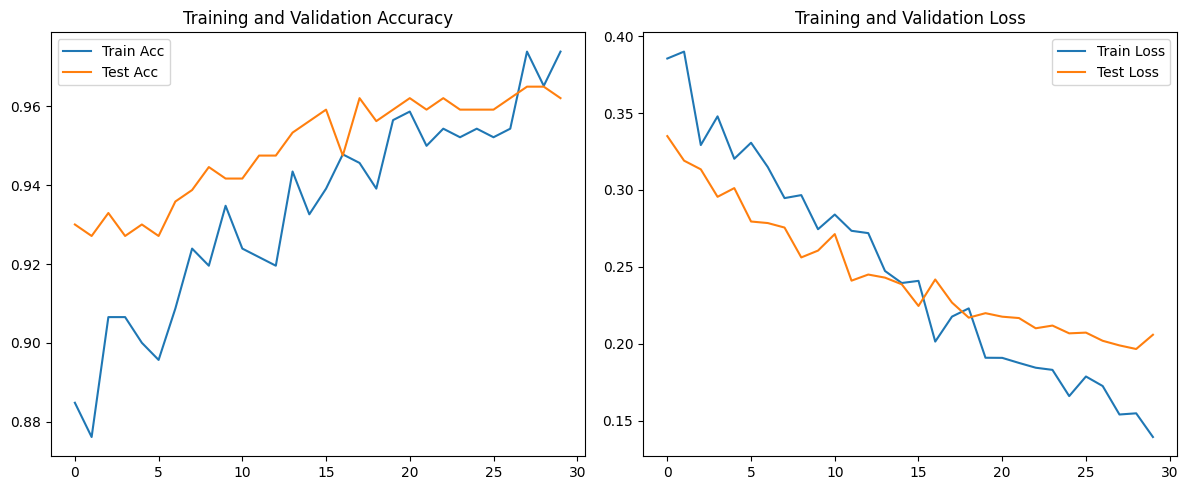

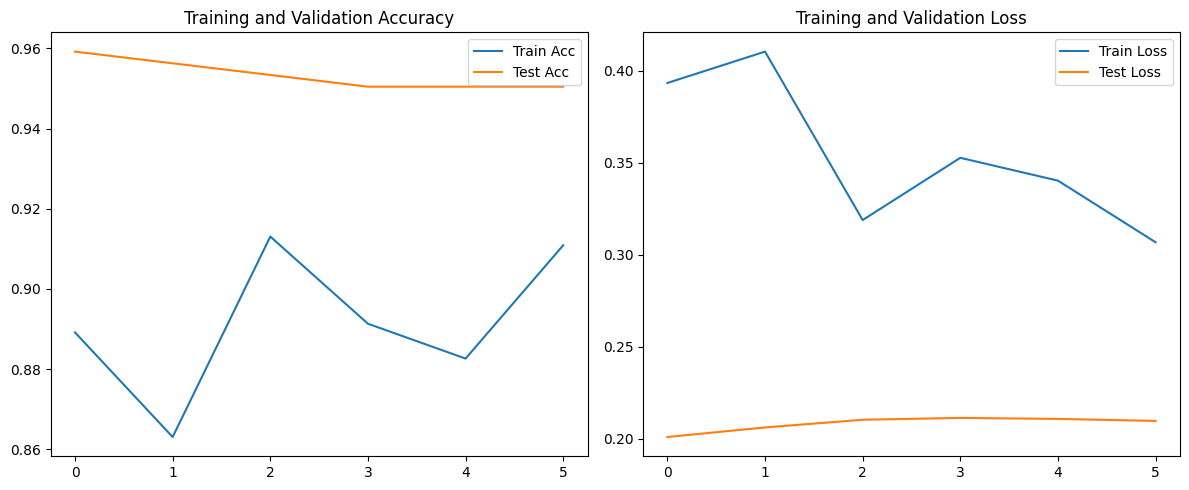

In [ ]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Acc')
    plt.plot(epochs, val_acc, label='Test Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Test Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training curves
plot_training(history_transfer)  # From feature extraction phase
plot_training(history_fine_tuned)  # From fine-tuning phase

### Compare with Baseline and Deeper Models

In [ ]:
# Predictions from baseline model
baseline_preds = baseline_model.predict(test_generator_tl)
baseline_y_pred = np.argmax(baseline_preds, axis=1)

# Predictions from deeper model (if available)
try:
    deep_preds = deep_model.predict(test_generator_tl)
    deep_y_pred = np.argmax(deep_preds, axis=1)
except:
    deep_y_pred = baseline_y_pred  # Skip if not available

# Function to get weighted F1 score
from sklearn.metrics import f1_score

baseline_f1 = f1_score(y_true_tl, baseline_y_pred, average='weighted')
deep_f1 = f1_score(y_true_tl, deep_y_pred, average='weighted')
tl_f1 = f1_score(y_true_tl, y_pred_tl, average='weighted')

# Print comparison
print("\nModel Performance Comparison:")
print("=" * 60)
print(f"{'Metric':<15} | {'Baseline':^20} | {'Deeper':^20} | {'Transfer Learning':^20}")
print("-" * 60)
print(f"{'F1-Score':<15} | {baseline_f1:.4f}            | {deep_f1:.4f}            | {tl_f1:.4f}")
print("=" * 60)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step

Model Performance Comparison:
Metric          |       Baseline       |        Deeper        |  Transfer Learning  
------------------------------------------------------------
F1-Score        | 0.6359            | 0.0375            | 0.9587
